In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
import warnings
warnings.filterwarnings('ignore')
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense,LSTM,Dropout,GRU

%matplotlib inline

In [ ]:
Data = pd.read_csv('/content/GOOG.csv',parse_dates =True)


In [ ]:
df = pd.DataFrame(Data)
df1 =df.copy()
df
df.describe().T
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB


In [ ]:
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,GOOG,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,GOOG,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,GOOG,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,GOOG,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0


In [ ]:
df['Date'] =df['date'].str.split(' ').str.get(0)
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor,Date
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0,2016-06-14
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0,2016-06-15
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0,2016-06-16
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0,2016-06-17
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0,2016-06-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,GOOG,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0,2021-06-07
1254,GOOG,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0,2021-06-08
1255,GOOG,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0,2021-06-09
1256,GOOG,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0,2021-06-10


In [ ]:
df.drop(columns=['date','symbol'],inplace=True)
df['Date']= pd.to_datetime(df['Date'])
df = df.set_index('Date')
df

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
Date,,,,,,,,,,,,
2016-06-14,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
2016-06-15,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2016-06-16,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
2016-06-17,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
2016-06-20,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-07,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
2021-06-08,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
2021-06-09,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0


In [ ]:
font1 = {'family':'serif','size':18}
font2 = {'family':'serif','size':15}
font3 = {'family':'serif','size':13}

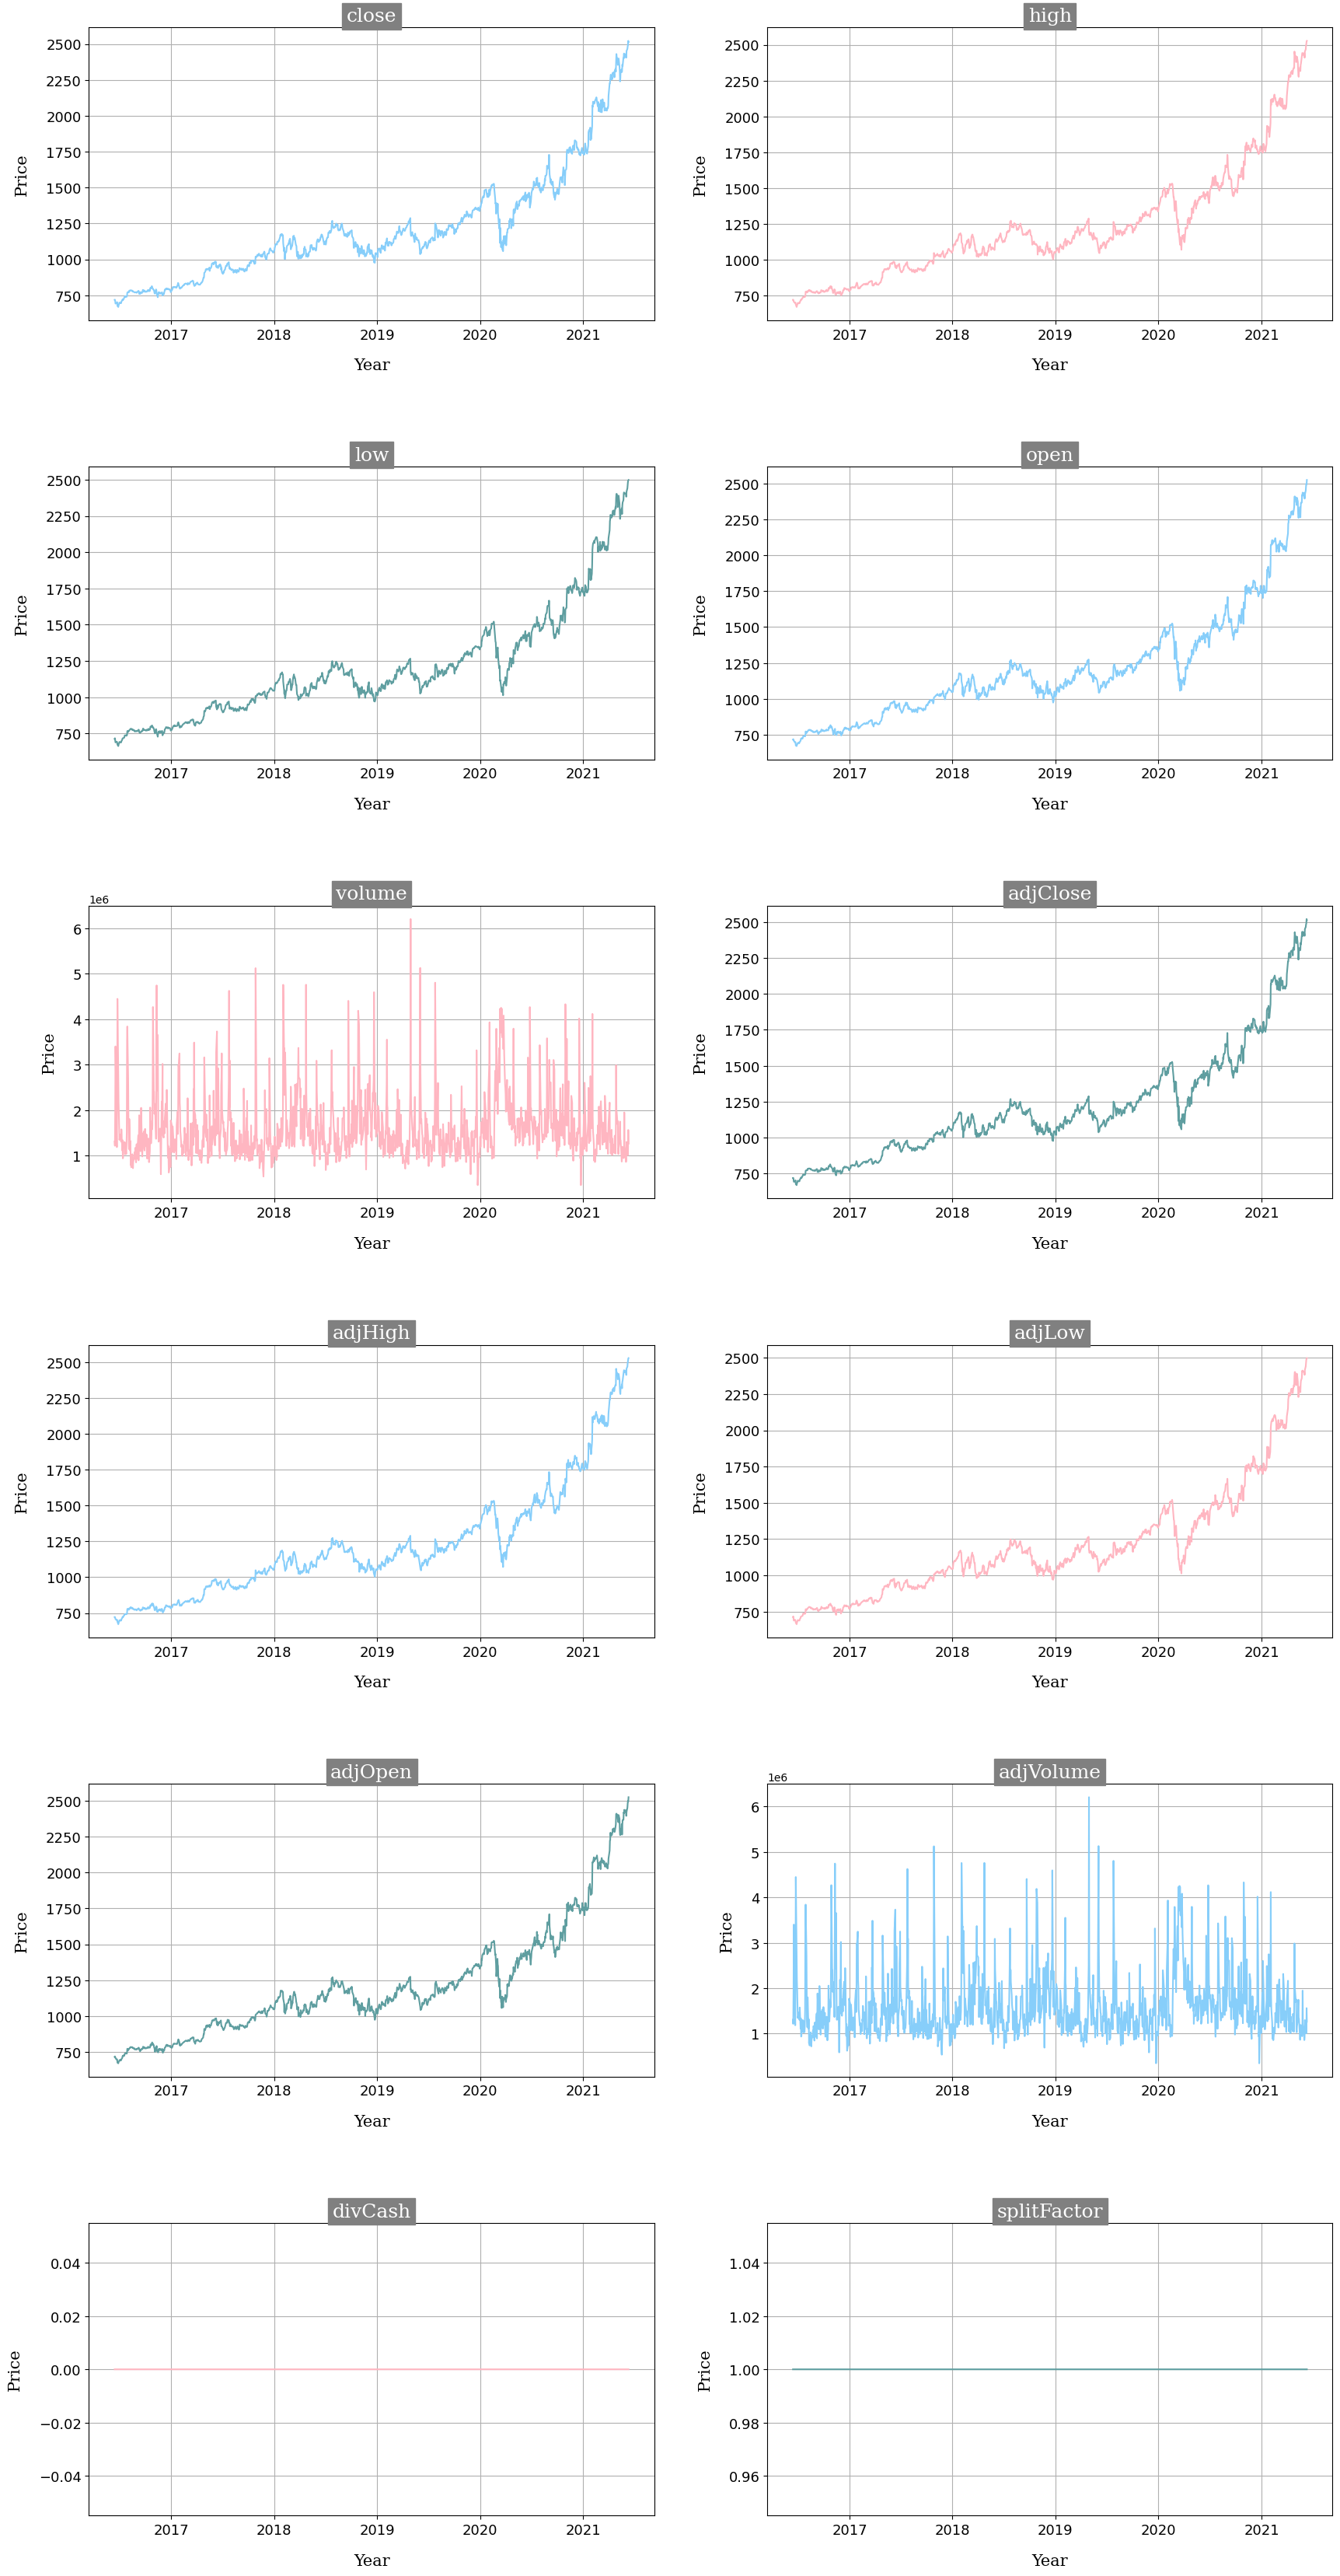

In [ ]:
colors =['blue','Red', 'Yellow','turquoise','blue','Red', 'Yellow','turquoise', 'blue','Red', 'Yellow','turquoise']
colors= ['lightskyblue' , 'lightpink' , 'cadetblue','lightskyblue' , 'lightpink' , 'cadetblue','lightskyblue' , 'lightpink' , 'cadetblue','lightskyblue' , 'lightpink' , 'cadetblue']
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(40)

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.2,
                    hspace=0.5)
i=1
for column in df.columns:
    plt.subplot(6,2,i)
    plt.plot(df[column], color=colors[i-1])
    plt.title(column,backgroundcolor='grey',color='white',fontdict=font1)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.xlabel('Year',fontdict=font2,labelpad=15)
    plt.ylabel("Price",fontdict=font2,labelpad=15)
    plt.grid()
    i+=1

In [ ]:
df2 = df.drop(columns=['volume','divCash','splitFactor','adjVolume'])
df2

,close,high,low,open,adjClose,adjHigh,adjLow,adjOpen
Date,,,,,,,,
2016-06-14,718.27,722.470,713.1200,716.48,718.27,722.470,713.1200,716.48
2016-06-15,718.92,722.980,717.3100,719.00,718.92,722.980,717.3100,719.00
2016-06-16,710.36,716.650,703.2600,714.91,710.36,716.650,703.2600,714.91
2016-06-17,691.72,708.820,688.4515,708.65,691.72,708.820,688.4515,708.65
2016-06-20,693.71,702.480,693.4100,698.77,693.71,702.480,693.4100,698.77
...,...,...,...,...,...,...,...,...
2021-06-07,2466.09,2468.000,2441.0725,2451.32,2466.09,2468.000,2441.0725,2451.32
2021-06-08,2482.85,2494.495,2468.2400,2479.90,2482.85,2494.495,2468.2400,2479.90
2021-06-09,2491.40,2505.000,2487.3300,2499.50,2491.40,2505.000,2487.3300,2499.50


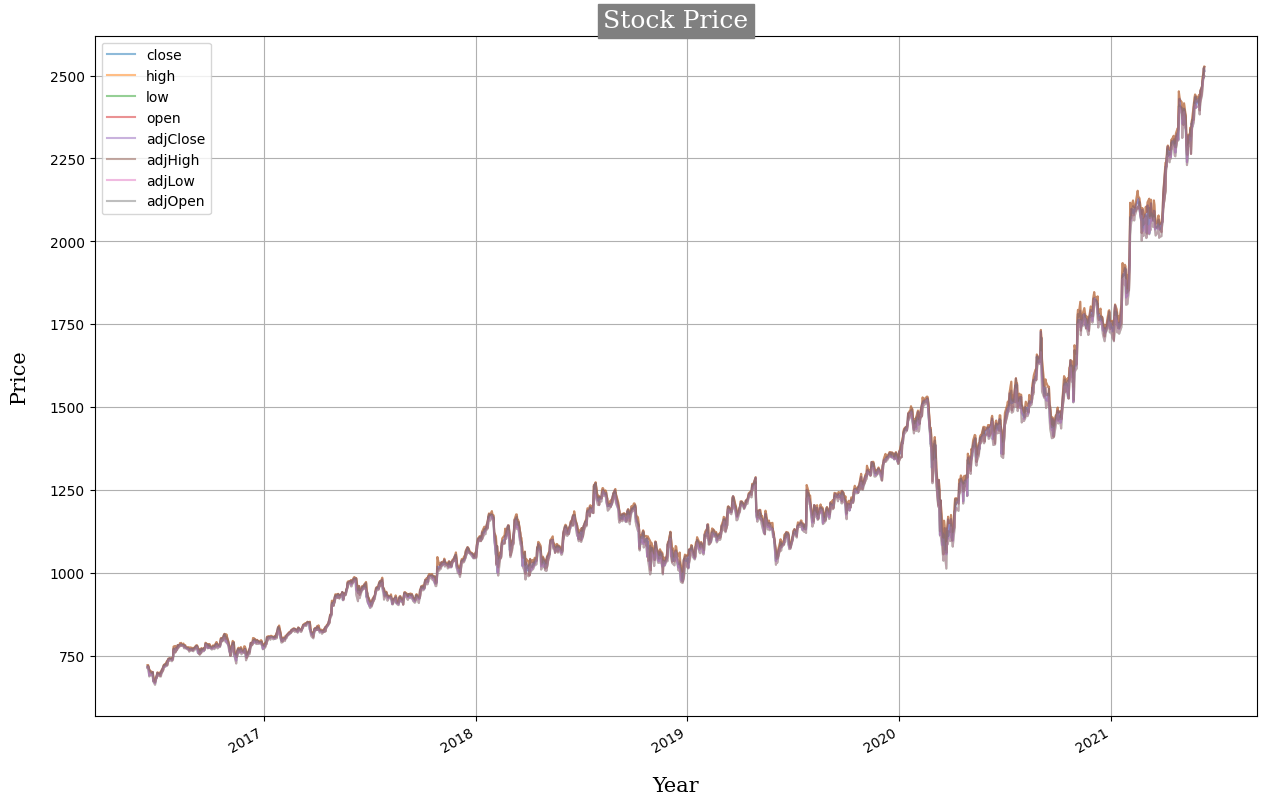

In [ ]:
fig,ax = plt.subplots(figsize=(15,10))
df2.plot(ax = ax,alpha=0.5)
ax.set_title('Stock Price',backgroundcolor='grey',color='white',fontdict=font1)
ax.set_xlabel('Year',fontdict=font2,labelpad=15)
ax.set_ylabel("Price",fontdict=font2,labelpad=15)
ax.grid()

In [ ]:
df1['Date'] =df1['date'].str.split(' ').str.get(0)
df1.drop(columns=['symbol','date','divCash','splitFactor'],inplace=True)
df_2016 = df1[(df1['Date']>='2016-01-01') &(df1['Date']<='2016-12-31')]
df_2016['Date']= pd.to_datetime(df_2016['Date'])
df_2016 = df_2016.set_index('Date')


In [ ]:
df_2021 = df1[(df1['Date']>='2021-01-01') & (df1['Date'] <='2021-12-31')]
df_2021['Date'] = pd.to_datetime(df_2021['Date'])
df_2021 = df_2021.set_index('Date')

In [ ]:
d2016 = df_2016.resample(rule ='MS').mean()
d2021 = df_2021.resample(rule ='MS').mean()


Text(0.5, 0, 'Month')

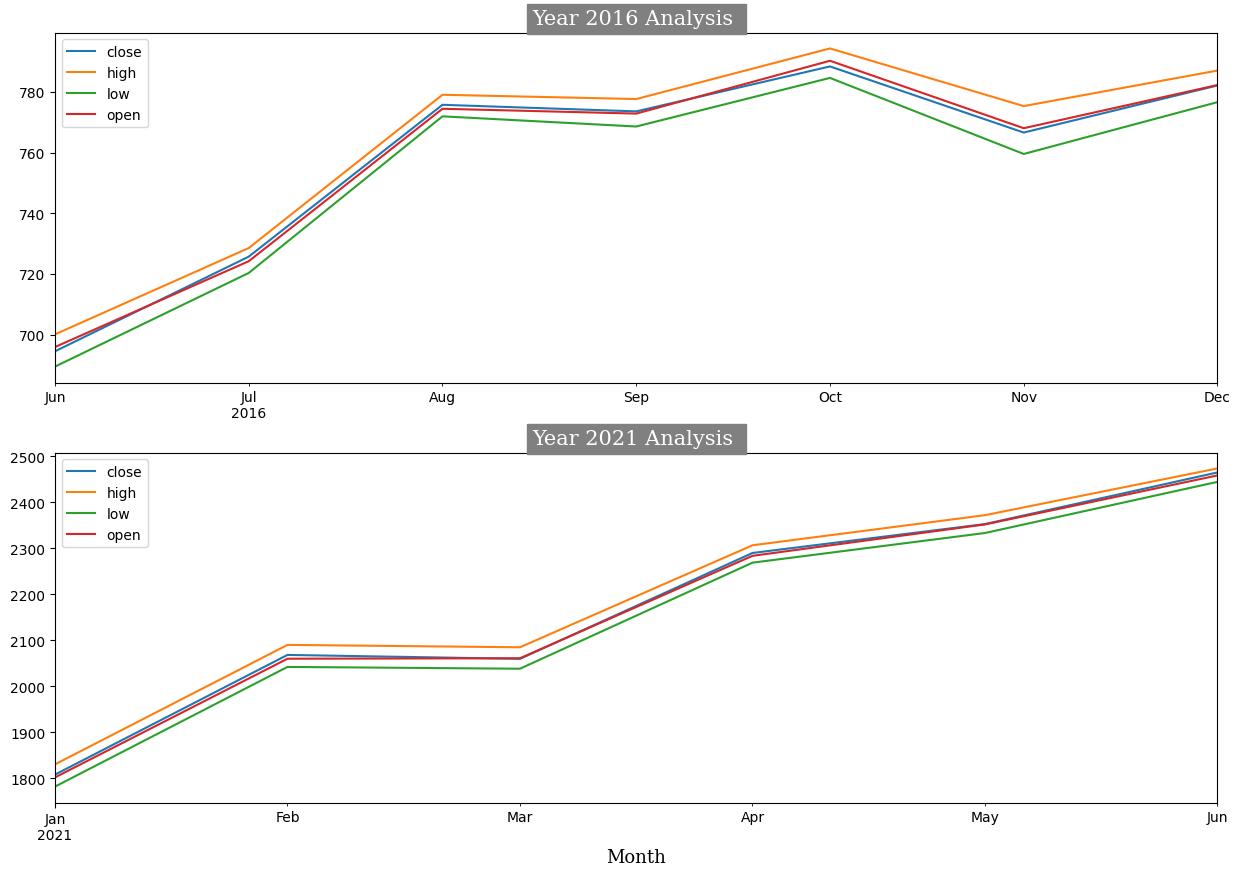

In [ ]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(15,10))
d2016[['close','high','low','open']].plot(ax=ax1)
ax1.set_title('Year 2016 Analysis ',backgroundcolor='grey',color='white',fontdict=font2)
d2021[['close','high','low','open']].plot(ax=ax2)
ax2.set_title('Year 2021 Analysis ',backgroundcolor='grey',color='white',fontdict=font2)

ax2.set_xlabel('Month',fontdict=font3)
ax1.set_xlabel('Month',fontdict=font3)

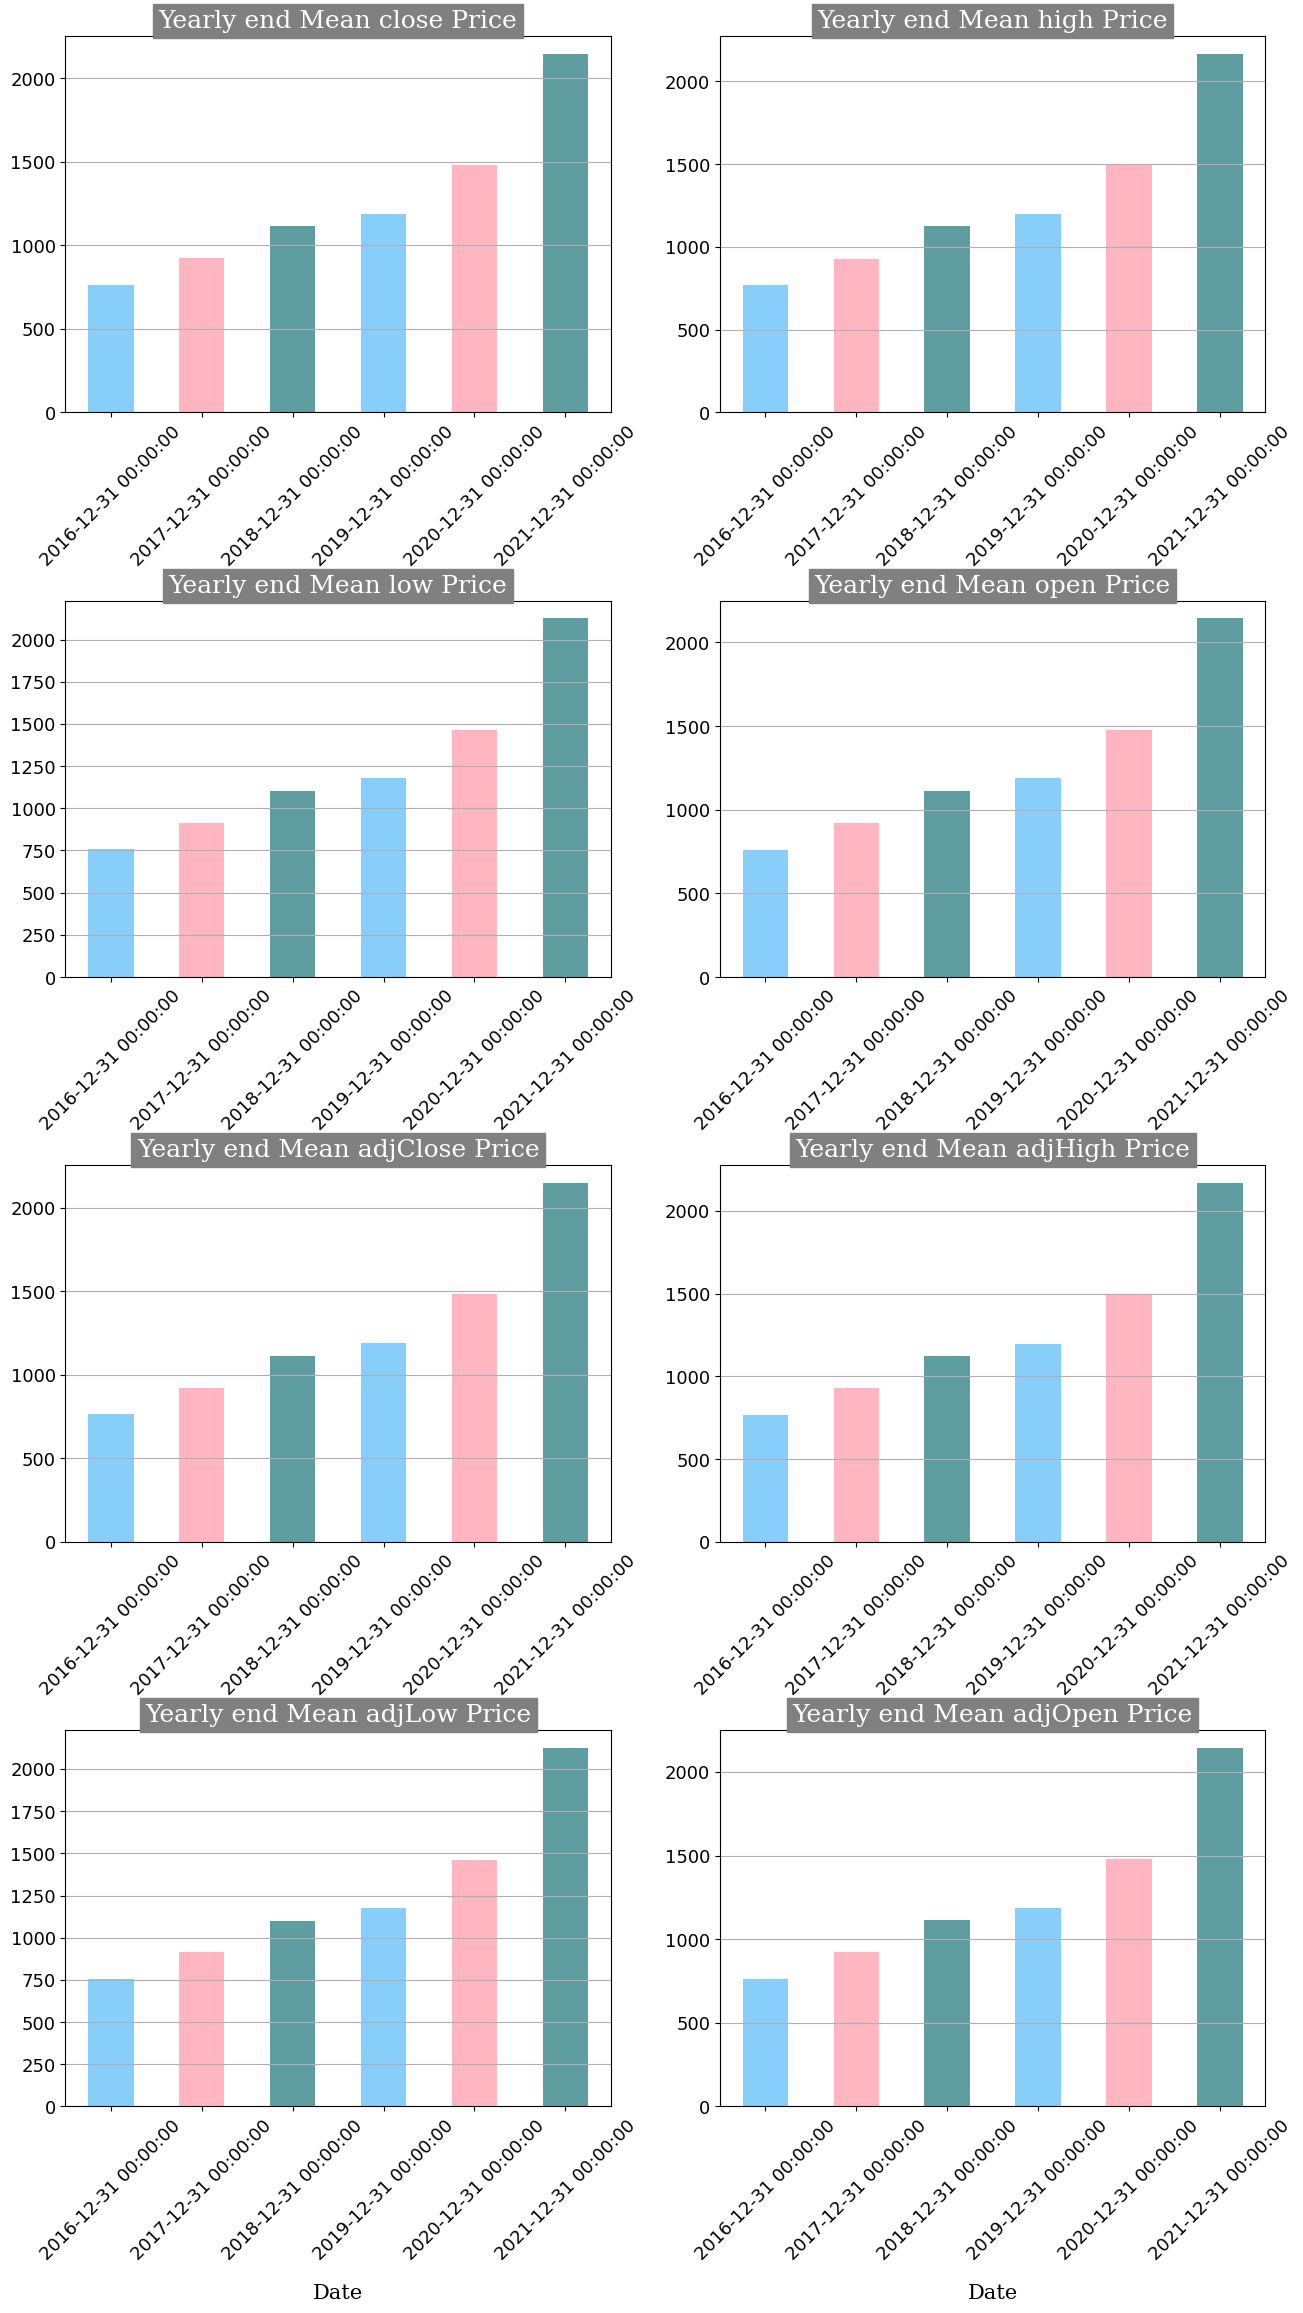

In [ ]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(40)
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.2,
                    hspace=0.5)
i = 1
for column in df.drop(columns=['volume','divCash','splitFactor','adjVolume']).columns:
    plt.subplot(6,2,i)
    ax = df[column].resample('A').mean().plot.bar(color =['lightskyblue' , 'lightpink' , 'cadetblue','lightskyblue' , 'lightpink' , 'cadetblue'])
    plt.xticks(rotation = 45,fontsize = 13)
    plt.yticks(fontsize = 13)
    plt.title(f'Yearly end Mean {column} Price',backgroundcolor='grey',color='white',fontdict=font1)
    plt.xlabel('Date',fontdict=font2,labelpad=15)
    ax.yaxis.grid(True)
    i+=1

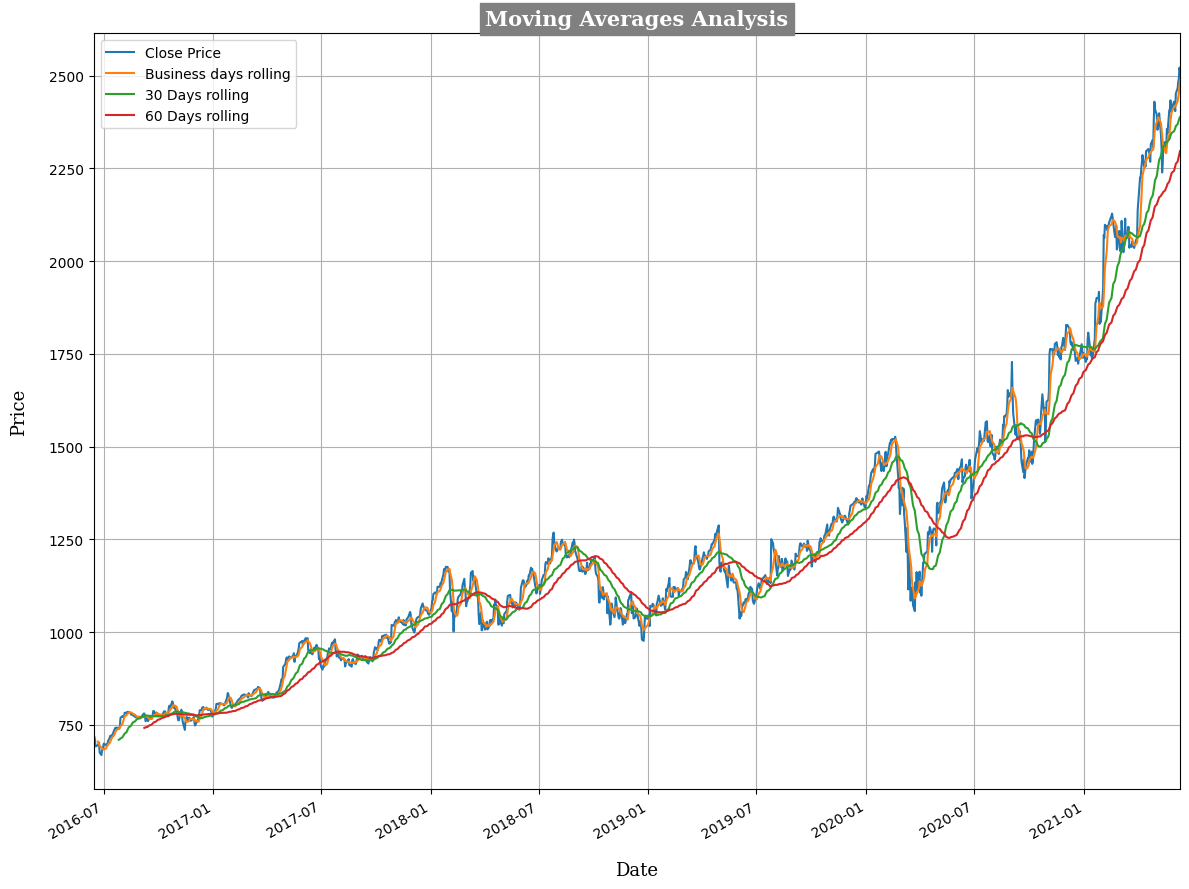

In [ ]:
W6 = df.rolling(window=6).mean()
W30 = df.rolling(window=30).mean()
W60 = df.rolling(window=60).mean()
plt.figure(figsize=(12, 9))
df['close'].plot(label='Close Price').autoscale(axis='x',tight=True)
W6['close'].plot(label='Business days rolling').autoscale(axis='x',tight=True)
W30['close'].plot(label='30 Days rolling').autoscale(axis='x',tight=True)
W60['close'].plot(label='60 Days rolling').autoscale(axis='x',tight=True)
plt.legend()
plt.title('Moving Averages Analysis',backgroundcolor='grey',color='white',fontdict=font2, fontweight='bold')
plt.xlabel('Date',fontdict=font3,labelpad=15)
plt.ylabel('Price',fontdict=font3,labelpad=15)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
DF = df[['close','high','low','open']]

In [ ]:
scaler = MinMaxScaler()
DF[DF.columns]= scaler.fit_transform(DF)
DF.shape

(1258, 4)

In [ ]:
training_size = round(len(DF)*0.80)
train_data = DF.iloc[:training_size,0:4]
test_data = DF.iloc[training_size:,0:4]
print(train_data.shape,test_data.shape)

(1006, 4) (252, 4)


In [ ]:
def prepare_time_series_data(Data,window_size):
  sequences =[]
  labels =[]
  i = 0
  for j   in range(window_size,len(Data)):
    sequences.append(Data.iloc[i:j])
    labels.append(Data.iloc[j])
    i+=1
  return np.array(sequences),np.array(labels)

In [ ]:
X_train ,y_train = prepare_time_series_data(train_data,60)
X_test ,y_test = prepare_time_series_data(test_data,60)
X_train.shape,y_train.shape,X_test.shape,y_test.shape


((946, 60, 4), (946, 4), (192, 60, 4), (192, 4))

In [ ]:
length = 60
LSTM1  = Sequential()
LSTM1.add(LSTM(100,return_sequences=True,input_shape=(length,X_train.shape[2])))
LSTM1.add(Dropout(0.2))
LSTM1.add(LSTM(100,return_sequences = False,input_shape=(length,X_train.shape[2])))
LSTM1.add(Dropout(0.2))
LSTM1.add(Dense(4))
LSTM1.compile(optimizer='adam',loss='mse',metrics=['mae'])
LSTM1.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           42000     
                                                                 
 dropout (Dropout)           (None, 60, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 4)                 404       
                                                                 
Total params: 122804 (479.70 KB)
Trainable params: 122804 (479.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
early_stop = EarlyStopping(monitor='loss',patience=5)

In [ ]:
LSTM1.fit(X_train,y_train,epochs=30,validation_data =(X_test,y_test),batch_size=32,callbacks=[early_stop])

Epoch 1/30
30/30 [==============================] - 9s 125ms/step - loss: 0.0071 - mae: 0.0577 - val_loss: 0.0190 - val_mae: 0.1184
Epoch 2/30
30/30 [==============================] - 3s 96ms/step - loss: 0.0013 - mae: 0.0271 - val_loss: 0.0084 - val_mae: 0.0779
Epoch 3/30
30/30 [==============================] - 4s 142ms/step - loss: 0.0011 - mae: 0.0244 - val_loss: 0.0076 - val_mae: 0.0731
Epoch 4/30
30/30 [==============================] - 3s 98ms/step - loss: 9.7086e-04 - mae: 0.0231 - val_loss: 0.0041 - val_mae: 0.0512
Epoch 5/30
30/30 [==============================] - 3s 98ms/step - loss: 0.0010 - mae: 0.0231 - val_loss: 0.0046 - val_mae: 0.0549
Epoch 6/30
30/30 [==============================] - 3s 98ms/step - loss: 8.5838e-04 - mae: 0.0215 - val_loss: 0.0030 - val_mae: 0.0431
Epoch 7/30
30/30 [==============================] - 4s 124ms/step - loss: 9.2680e-04 - mae: 0.0223 - val_loss: 0.0037 - val_mae: 0.0497
Epoch 8/30
30/30 [==============================] - 3s 101ms/step - 

In [ ]:
LSTM1.history.history.keys()


dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

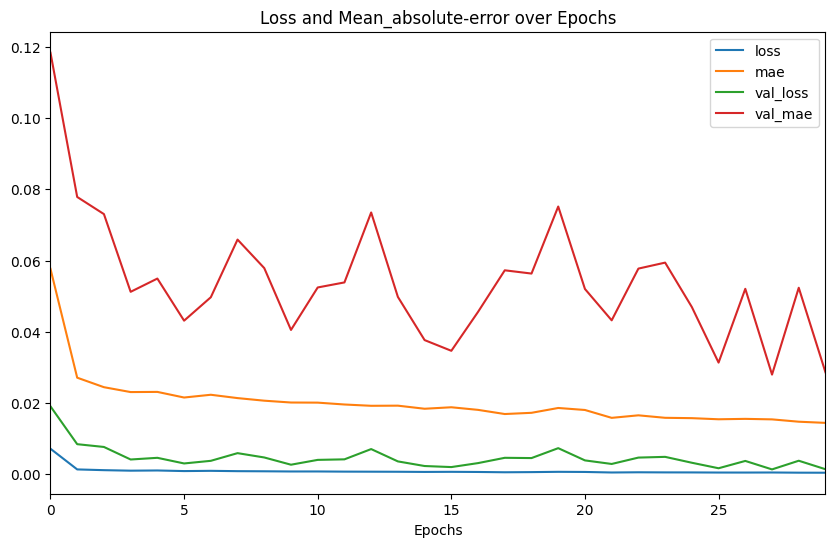

In [ ]:
title = 'Loss and Mean_absolute-error over Epochs'
xlabel='Epochs'
LSTM1_losses = pd.DataFrame(LSTM1.history.history)
ax = LSTM1_losses.plot(figsize=(10,6),title =title)
ax.autoscale(axis = 'x',tight=True)
ax.set(xlabel=xlabel);

In [ ]:
def highlight_best(data):
  data_highlighted= data.copy()
  min_loss = data_highlighted['loss'].min()
  min_mae = data_highlighted['mae'].min
  min_val_loss = data_highlighted['val_loss'].min()
  min_val_mae = data_highlighted['val_mae'].min()
  min_loass = data_highlighted['loss']==min_loss
  min_mae = data_highlighted['mae']==min_mae
  min_val_loss = data_highlighted['val_loss']==min_val_loss
  min_val_mae = data_highlighted['val_mae']==min_val_mae

  data_highlighted.style.apply(lambda x: ['background: yellow' if v else '' for v in min_loss], subset=['loss']) \
                  .apply(lambda x: ['background: yellow' if v else '' for v in min_mae], subset=['mae']) \
                  .apply(lambda x: ['background: yellow' if v else '' for v in min_val_loss], subset=['val_loss']) \
                  .apply(lambda x: ['background: yellow' if v else '' for v in min_val_mae], subset=['val_mae'])
  return data_highlighted

In [ ]:
def highlight_best(data):
    data_highlighted = data.copy()

    min_loss = data_highlighted['loss'].min()
    min_mae = data_highlighted['mae'].min()
    min_val_loss = data_highlighted['val_loss'].min()
    min_val_mae = data_highlighted['val_mae'].min()

    data_highlighted['loss_highlight'] = data_highlighted['loss'] == min_loss
    data_highlighted['mae_highlight'] = data_highlighted['mae'] == min_mae
    data_highlighted['val_loss_highlight'] = data_highlighted['val_loss'] == min_val_loss
    data_highlighted['val_mae_highlight'] = data_highlighted['val_mae'] == min_val_mae

    # Apply styling based on boolean masks
    data_highlighted = data_highlighted.style.applymap(lambda v: 'background: yellow' if v else '', subset=['loss_highlight', 'mae_highlight', 'val_loss_highlight', 'val_mae_highlight'])

    return data_highlighted


In [ ]:
highlighted_LSTM1_losses = highlight_best(LSTM1_losses)
highlighted_LSTM1_losses

,loss,mae,val_loss,val_mae,loss_highlight,mae_highlight,val_loss_highlight,val_mae_highlight
0,0.007134,0.057674,0.019043,0.118394,False,False,False,False
1,0.001324,0.027096,0.008414,0.077868,False,False,False,False
2,0.001114,0.024426,0.007633,0.073055,False,False,False,False
3,0.000971,0.023054,0.004111,0.051222,False,False,False,False
4,0.001028,0.023102,0.004584,0.054945,False,False,False,False
5,0.000858,0.021523,0.002999,0.043116,False,False,False,False
6,0.000927,0.022299,0.003739,0.049695,False,False,False,False
7,0.000834,0.021362,0.005896,0.065895,False,False,False,False
8,0.000799,0.020633,0.004681,0.057882,False,False,False,False
9,0.000745,0.020120,0.002648,0.040512,False,False,False,False


In [ ]:
def predict_and_inverse_transform(DF,X_test,model,scaler):
  test = DF.iloc[-len(X_test):].copy()
  predictions = model.predict(X_test)
  inverse_predictions = scaler.inverse_transform(predictions)
  inverse_predictions = pd.DataFrame(inverse_predictions,columns=['Predicted Close','Predicted High','Predicted Low','Predicted Open'],index= DF.iloc[-len(X_test):].index)
  test_df =pd.concat([test.copy(),inverse_predictions],axis = 1)
  test_df[['close','high','low','open']] = scaler.inverse_transform(test_df[['close','high','low','open']])
  return test_df

In [ ]:
test_df = predict_and_inverse_transform(DF,X_test,LSTM1,scaler)


6/6 [==============================] - 1s 33ms/step


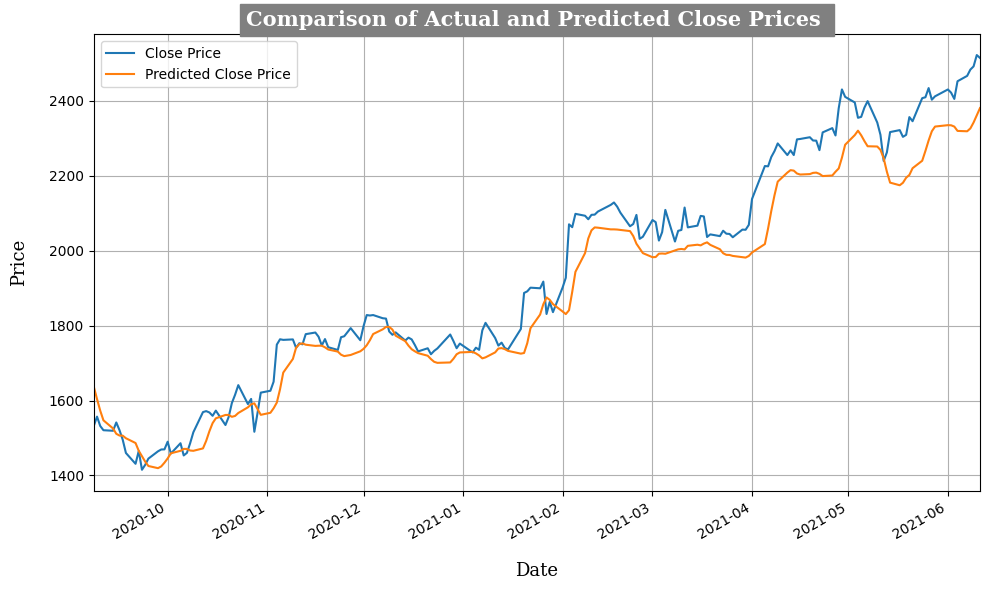

In [ ]:
plt.figure(figsize=(10,6))
test_df['close'].plot(label='Close Price').autoscale(axis='x',tight=True)
test_df['Predicted Close'].plot(label='Predicted Close Price').autoscale(axis='x',tight=True)
plt.legend()
plt.title('Comparison of Actual and Predicted Close Prices ',backgroundcolor='grey',color='white',fontdict=font2, fontweight='bold')
plt.xlabel('Date',fontdict=font3,labelpad=15)
plt.ylabel('Price',fontdict=font3,labelpad=15)
plt.tight_layout()
plt.grid(True)

In [ ]:
LSTM2 = Sequential()
LSTM2.add(LSTM(150,input_shape=(length,X_train.shape[2]),return_sequences=True))
LSTM2.add(Dropout(0.2))
LSTM2.add(LSTM(100,input_shape=(length,X_train.shape[2]),return_sequences=True))
LSTM2.add(Dropout(0.2))
LSTM2.add(LSTM(100,input_shape=(length,X_train.shape[2]),return_sequences=False))
LSTM2.add(Dropout(0.2))
LSTM2.add(Dense(units=50))
LSTM2.add(Dense(units=5))
LSTM2.add(Dense(X_train.shape[2]))
LSTM2.compile(optimizer='adam',loss='mse',metrics=['mae'])
LSTM2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 150)           93000     
                                                                 
 dropout_2 (Dropout)         (None, 60, 150)           0         
                                                                 
 lstm_3 (LSTM)               (None, 60, 100)           100400    
                                                                 
 dropout_3 (Dropout)         (None, 60, 100)           0         
                                                                 
 lstm_4 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 50)               

In [ ]:
LSTM2.fit(X_train, y_train,epochs=30,validation_data=(X_test, y_test),batch_size = 32,callbacks=[early_stop],verbose=1)

Epoch 1/30
30/30 [==============================] - 15s 258ms/step - loss: 0.0064 - mae: 0.0534 - val_loss: 0.0263 - val_mae: 0.1468
Epoch 2/30
30/30 [==============================] - 8s 257ms/step - loss: 0.0017 - mae: 0.0311 - val_loss: 0.0243 - val_mae: 0.1389
Epoch 3/30
30/30 [==============================] - 6s 198ms/step - loss: 0.0013 - mae: 0.0262 - val_loss: 0.0107 - val_mae: 0.0880
Epoch 4/30
30/30 [==============================] - 8s 258ms/step - loss: 9.8059e-04 - mae: 0.0229 - val_loss: 0.0069 - val_mae: 0.0686
Epoch 5/30
30/30 [==============================] - 6s 201ms/step - loss: 8.2644e-04 - mae: 0.0208 - val_loss: 0.0038 - val_mae: 0.0485
Epoch 6/30
30/30 [==============================] - 8s 255ms/step - loss: 8.0918e-04 - mae: 0.0204 - val_loss: 0.0082 - val_mae: 0.0778
Epoch 7/30
30/30 [==============================] - 6s 209ms/step - loss: 7.0132e-04 - mae: 0.0193 - val_loss: 0.0122 - val_mae: 0.0970
Epoch 8/30
30/30 [==============================] - 8s 269m

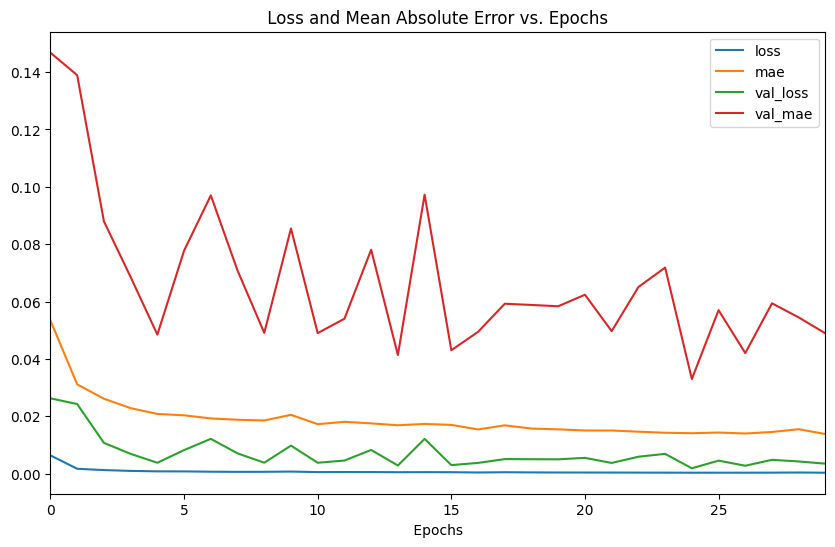

In [ ]:
title=' Loss and Mean Absolute Error vs. Epochs '
xlabel=' Epochs '
LSTM2_losses = pd.DataFrame(LSTM2.history.history)

ax = LSTM2_losses.plot(figsize=(10,6),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel);

In [ ]:
highlighted_LSTM2_losses = highlight_best(LSTM2_losses)
highlighted_LSTM2_losses

,loss,mae,val_loss,val_mae,loss_highlight,mae_highlight,val_loss_highlight,val_mae_highlight
0,0.006381,0.053377,0.026280,0.146758,False,False,False,False
1,0.001724,0.031147,0.024277,0.138921,False,False,False,False
2,0.001270,0.026150,0.010739,0.087978,False,False,False,False
3,0.000981,0.022858,0.006917,0.068551,False,False,False,False
4,0.000826,0.020842,0.003817,0.048495,False,False,False,False
5,0.000809,0.020360,0.008232,0.077761,False,False,False,False
6,0.000701,0.019271,0.012153,0.097018,False,False,False,False
7,0.000649,0.018811,0.007095,0.070839,False,False,False,False
8,0.000666,0.018565,0.003835,0.049090,False,False,False,False
9,0.000751,0.020528,0.009800,0.085479,False,False,False,False


In [ ]:
test_df2 = predict_and_inverse_transform(DF,X_test,LSTM2,scaler)


6/6 [==============================] - 2s 95ms/step


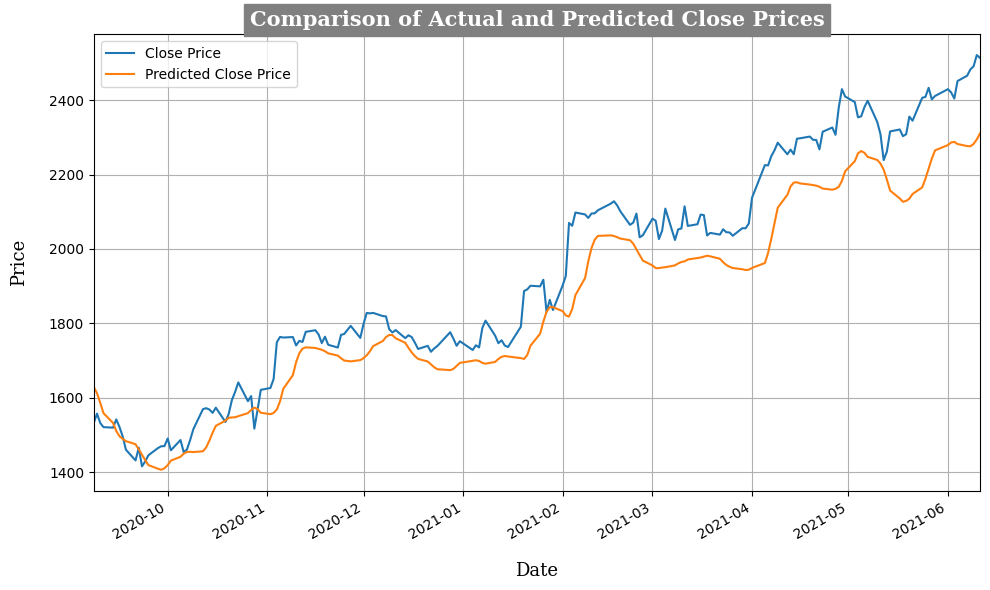

In [ ]:
plt.figure(figsize=(10, 6))
test_df2['close'].plot(label='Close Price').autoscale(axis='x',tight=True)
test_df2['Predicted Close'].plot(label='Predicted Close Price').autoscale(axis='x',tight=True)

plt.legend()
plt.title('Comparison of Actual and Predicted Close Prices',backgroundcolor='grey',color='white',fontdict=font2, fontweight='bold')
plt.xlabel('Date',fontdict=font3,labelpad=15)
plt.ylabel('Price',fontdict=font3,labelpad=15)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
GRU_Model = Sequential()
GRU_Model.add(GRU(128,input_shape=(length,X_train.shape[2]),activation='tanh'))
GRU_Model.add(Dense(X_train.shape[2]))
GRU_Model.compile(optimizer='adam',loss='mse',metrics=['mae'])
GRU_Model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 128)               51456     
                                                                 
 dense_4 (Dense)             (None, 4)                 516       
                                                                 
Total params: 51972 (203.02 KB)
Trainable params: 51972 (203.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
GRU_Model.fit(X_train, y_train, epochs=30,validation_data=(X_test, y_test),batch_size = 32,callbacks=[early_stop],verbose=1)


Epoch 1/30
30/30 [==============================] - 4s 69ms/step - loss: 0.0120 - mae: 0.0759 - val_loss: 0.0388 - val_mae: 0.1748
Epoch 2/30
30/30 [==============================] - 2s 53ms/step - loss: 8.5360e-04 - mae: 0.0228 - val_loss: 0.0071 - val_mae: 0.0700
Epoch 3/30
30/30 [==============================] - 2s 53ms/step - loss: 2.7127e-04 - mae: 0.0125 - val_loss: 0.0010 - val_mae: 0.0242
Epoch 4/30
30/30 [==============================] - 2s 53ms/step - loss: 1.6786e-04 - mae: 0.0092 - val_loss: 7.8539e-04 - val_mae: 0.0208
Epoch 5/30
30/30 [==============================] - 2s 61ms/step - loss: 1.5997e-04 - mae: 0.0090 - val_loss: 5.7609e-04 - val_mae: 0.0177
Epoch 6/30
30/30 [==============================] - 3s 88ms/step - loss: 1.5223e-04 - mae: 0.0087 - val_loss: 5.6962e-04 - val_mae: 0.0177
Epoch 7/30
30/30 [==============================] - 2s 56ms/step - loss: 1.5219e-04 - mae: 0.0087 - val_loss: 6.3436e-04 - val_mae: 0.0188
Epoch 8/30
30/30 [=========================

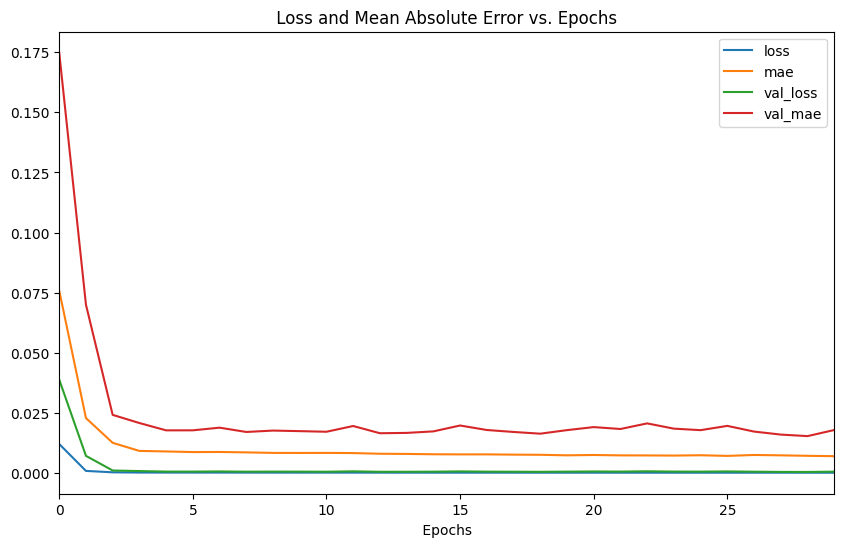

In [ ]:
title=' Loss and Mean Absolute Error vs. Epochs '
xlabel=' Epochs '
GRU_losses = pd.DataFrame(GRU_Model.history.history)

ax = GRU_losses.plot(figsize=(10,6),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel);


In [ ]:
highlighted_GRU_losses = highlight_best(GRU_losses)
highlighted_GRU_losses

,loss,mae,val_loss,val_mae,loss_highlight,mae_highlight,val_loss_highlight,val_mae_highlight
0,0.012039,0.075876,0.038811,0.174818,False,False,False,False
1,0.000854,0.022841,0.007120,0.070004,False,False,False,False
2,0.000271,0.012539,0.001024,0.024167,False,False,False,False
3,0.000168,0.009176,0.000785,0.020773,False,False,False,False
4,0.000160,0.008955,0.000576,0.017727,False,False,False,False
5,0.000152,0.008692,0.000570,0.017738,False,False,False,False
6,0.000152,0.008735,0.000634,0.018843,False,False,False,False
7,0.000147,0.008563,0.000535,0.017054,False,False,False,False
8,0.000141,0.008348,0.000568,0.017635,False,False,False,False
9,0.000140,0.008324,0.000554,0.017400,False,False,False,False


In [ ]:
test_df3 = predict_and_inverse_transform(DF, X_test, GRU_Model, scaler)

6/6 [==============================] - 1s 18ms/step


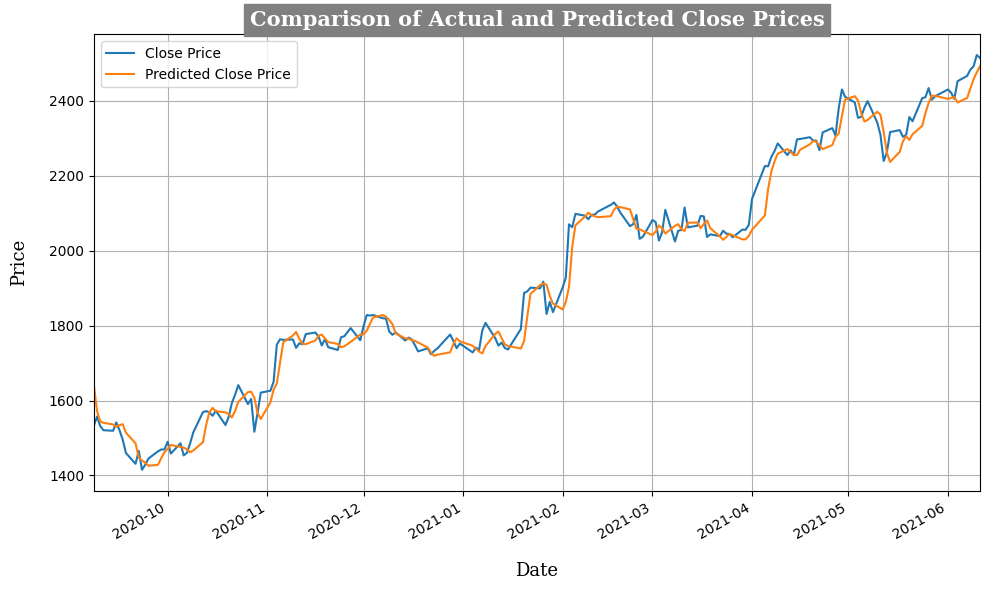

In [ ]:
plt.figure(figsize=(10, 6))
test_df3['close'].plot(label='Close Price').autoscale(axis='x',tight=True)
test_df3['Predicted Close'].plot(label='Predicted Close Price').autoscale(axis='x',tight=True)

plt.legend()
plt.title('Comparison of Actual and Predicted Close Prices',backgroundcolor='grey',color='white',fontdict=font2, fontweight='bold')
plt.xlabel('Date',fontdict=font3,labelpad=15)
plt.ylabel('Price',fontdict=font3,labelpad=15)
plt.grid(True)
plt.tight_layout()

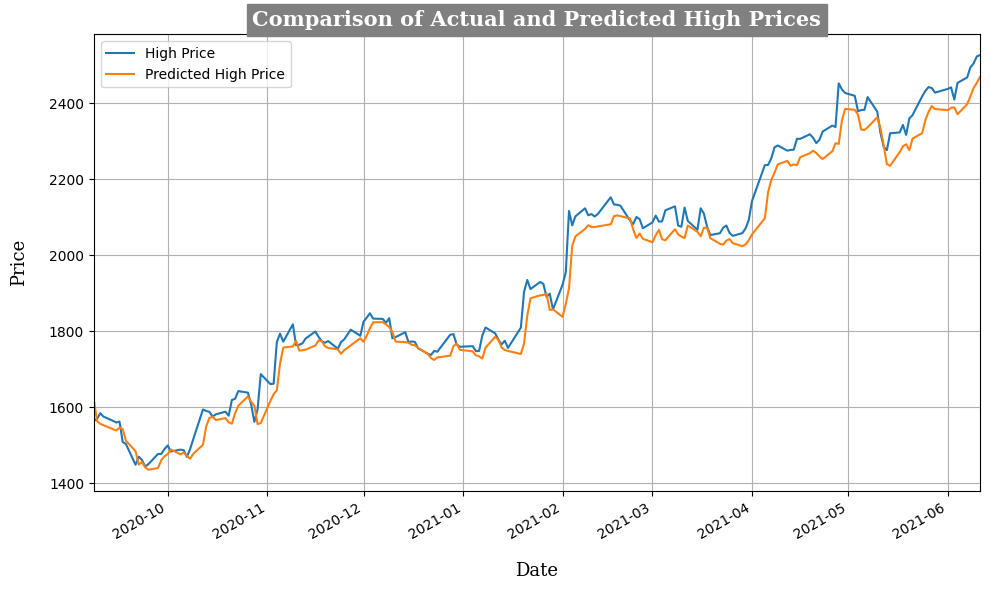

In [ ]:
plt.figure(figsize=(10, 6))
test_df3['high'].plot(label='High Price').autoscale(axis='x',tight=True)
test_df3['Predicted High'].plot(label='Predicted High Price').autoscale(axis='x',tight=True)

plt.legend()
plt.title('Comparison of Actual and Predicted High Prices',backgroundcolor='grey',color='white',fontdict=font2, fontweight='bold')
plt.xlabel('Date',fontdict=font3,labelpad=15)
plt.ylabel('Price',fontdict=font3,labelpad=15)
plt.grid(True)
plt.tight_layout()

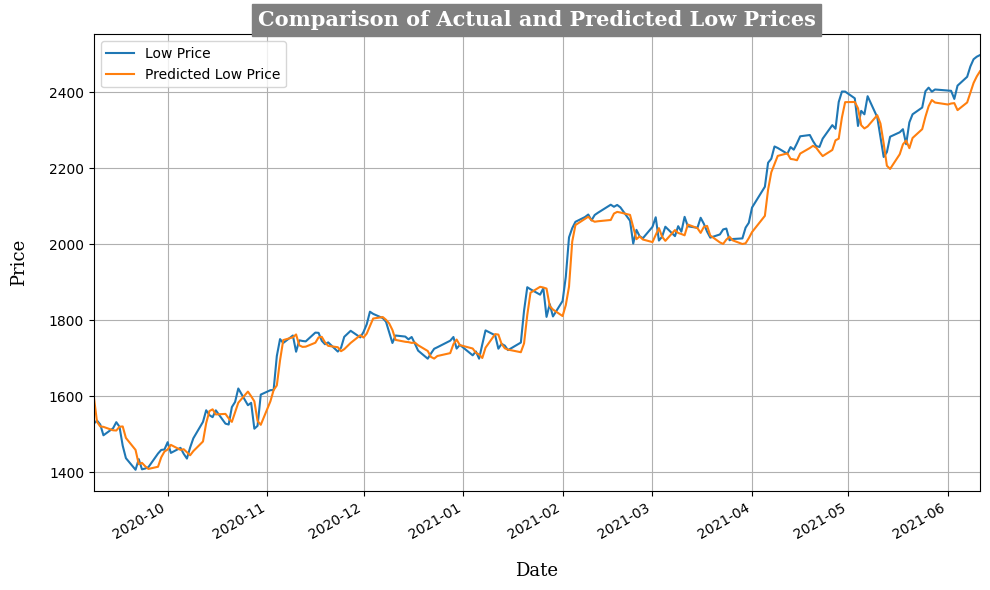

In [ ]:
plt.figure(figsize=(10, 6))
test_df3['low'].plot(label='Low Price').autoscale(axis='x',tight=True)
test_df3['Predicted Low'].plot(label='Predicted Low Price').autoscale(axis='x',tight=True)

plt.legend()
plt.title('Comparison of Actual and Predicted Low Prices',backgroundcolor='grey',color='white',fontdict=font2, fontweight='bold')
plt.xlabel('Date',fontdict=font3,labelpad=15)
plt.ylabel('Price',fontdict=font3,labelpad=15)
plt.grid(True)
plt.tight_layout()

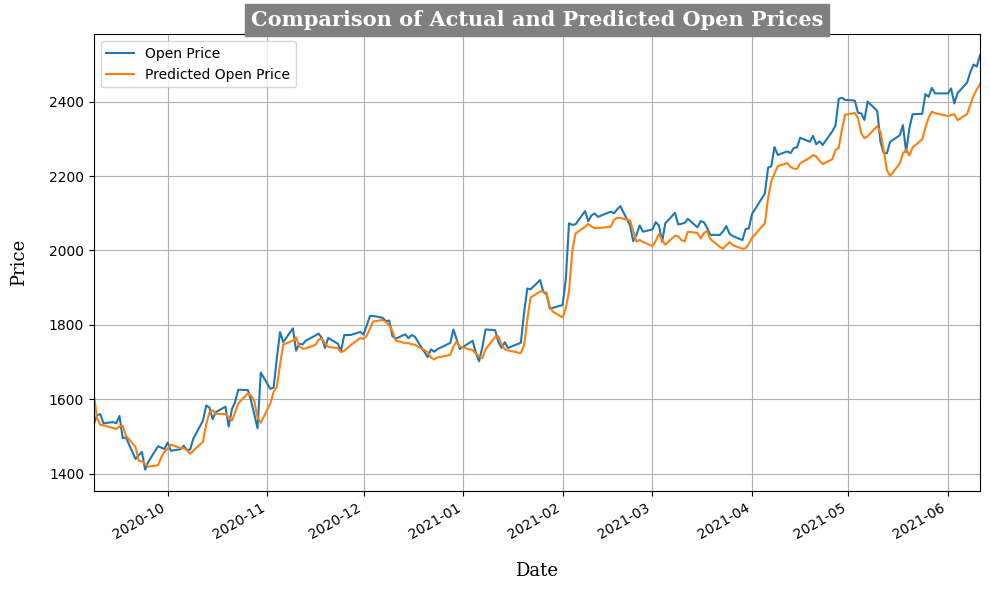

In [ ]:
plt.figure(figsize=(10, 6))
test_df3['open'].plot(label='Open Price').autoscale(axis='x',tight=True)
test_df3['Predicted Open'].plot(label='Predicted Open Price').autoscale(axis='x',tight=True)

plt.legend()
plt.title('Comparison of Actual and Predicted Open Prices',backgroundcolor='grey',color='white',fontdict=font2, fontweight='bold')
plt.xlabel('Date',fontdict=font3,labelpad=15)
plt.ylabel('Price',fontdict=font3,labelpad=15)
plt.grid(True)
plt.tight_layout()

**NEXT**

NEW **MODEL**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pi
import plotly.express as px
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta

In [ ]:
daily_changes = df['close'].diff()
fig = px.histogram(daily_changes, nbins=50, title='Histogram of Daily Price Changes')
fig.update_xaxes(title='Daily Price Change')
fig.update_yaxes(title='Frequency')
fig.update_layout(template='plotly_dark')
fig.show()

In [ ]:
df

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
Date,,,,,,,,,,,,
2016-06-14,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
2016-06-15,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2016-06-16,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
2016-06-17,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
2016-06-20,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-07,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
2021-06-08,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
2021-06-09,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0


In [ ]:
df['20_day_MA']= df['close'].rolling(window=20).mean()
fig = go.Figure(data=[go.Candlestick(x=df.index,open=df['open'],high=df['high'],low=df['low'],close=df['close'],name="Candlesticks",increasing_line_color='green',decreasing_line_color='red',line=dict(width=1),showlegend=False)])
fig.add_trace(go.Scatter(x=df.index,y=df['20_day_MA'],mode ='lines',name='20 day MA',line=dict(color='rgba(255,255,0,0.3)')))
fig.update_layout(xaxis_title="Date",yaxis_title="Price",title="Google Stock Price Analysis",template='plotly_dark')
fig.show()


In [ ]:
fig = go.Figure()

# Candlestick chart
fig.add_trace(go.Candlestick(
    x=df.index,open=df['open'],high=df['high'],low=df['low'],close=df['close'],name="Candlesticks",increasing_line_color='green',decreasing_line_color='red',line=dict(width=1),showlegend=False
))

# 20-day Moving Average line
fig.add_trace(go.Scatter(x=df.index,y=df['20_day_MA'],mode='lines',name='20 day MA',line=dict(color='rgba(255,255,0,0.3)')
))

# Update layout
fig.update_layout(xaxis_title="Date",yaxis_title="Price",title="Google Stock Price Analysis",template='plotly_dark'
)

# Show the figure
fig.show()

In [ ]:
df=df.drop('20_day_MA',axis=1)

In [ ]:
df['date'] = pd.to_datetime(df.index)
df=df[['date','close','high','low','open','volume']]

In [ ]:
scaler =MinMaxScaler()
normalized_data = df[['open','high','low','close','volume']].copy()
normalized_data = scaler.fit_transform(normalized_data)


In [ ]:
train_data,test_data = train_test_split(normalized_data,train_size=0.8,shuffle=False)
train_df = pd.DataFrame(train_data, columns=['open', 'high', 'low', 'volume', 'close'])
test_df = pd.DataFrame(test_data, columns=['open', 'high', 'low', 'volume', 'close'])

In [ ]:
def generate_sequences(df, seq_length=50):
    X = df[['open', 'high', 'low', 'volume', 'close']].reset_index(drop=True)
    y = df[['open', 'high', 'low', 'volume', 'close']].reset_index(drop=True)

    sequences = []
    labels = []

    for index in range(len(X) - seq_length + 1):
        sequences.append(X.iloc[index : index + seq_length].values)
        labels.append(y.iloc[index + seq_length - 1].values)

    sequences = np.array(sequences)
    labels = np.array(labels)

    return sequences, labels

In [ ]:
train_sequences, train_labels = generate_sequences(train_df)
test_sequences, test_labels = generate_sequences(test_df)

In [ ]:
model = Sequential([
    LSTM(units= 50,return_sequences=True,input_shape=(50,5)),
    Dropout(0.2),
    LSTM(units=50,return_sequences=True),
    Dropout(0.2),
    LSTM(units=50),
    Dropout(0.2),
    Dense(units=5)
    ])

In [ ]:
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mae'])
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 50, 50)            11200     
                                                                 
 dropout_8 (Dropout)         (None, 50, 50)            0         
                                                                 
 lstm_9 (LSTM)               (None, 50, 50)            20200     
                                                                 
 dropout_9 (Dropout)         (None, 50, 50)            0         
                                                                 
 lstm_10 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_10 (Dropout)        (None, 50)                0         
                                                                 
 dense_6 (Dense)             (None, 5)                

In [ ]:
epochs = 200
batch_size= 32
history = model.fit(
    train_sequences,
    train_labels,
    epochs = epochs,
    batch_size = batch_size,
    validation_data = (test_sequences,test_labels),
    verbose = 1
)

Epoch 1/200
30/30 [==============================] - 12s 161ms/step - loss: 0.0124 - mae: 0.0791 - val_loss: 0.0353 - val_mae: 0.1680
Epoch 2/200
30/30 [==============================] - 4s 130ms/step - loss: 0.0048 - mae: 0.0455 - val_loss: 0.0133 - val_mae: 0.0937
Epoch 3/200
30/30 [==============================] - 4s 143ms/step - loss: 0.0042 - mae: 0.0410 - val_loss: 0.0176 - val_mae: 0.1138
Epoch 4/200
30/30 [==============================] - 2s 80ms/step - loss: 0.0040 - mae: 0.0395 - val_loss: 0.0198 - val_mae: 0.1223
Epoch 5/200
30/30 [==============================] - 2s 76ms/step - loss: 0.0041 - mae: 0.0409 - val_loss: 0.0139 - val_mae: 0.0998
Epoch 6/200
30/30 [==============================] - 2s 74ms/step - loss: 0.0038 - mae: 0.0382 - val_loss: 0.0117 - val_mae: 0.0893
Epoch 7/200
30/30 [==============================] - 3s 94ms/step - loss: 0.0037 - mae: 0.0374 - val_loss: 0.0170 - val_mae: 0.1146
Epoch 8/200
30/30 [==============================] - 3s 105ms/step - los

In [ ]:
train_predictions = model.predict(train_sequences)
test_predictions = model.predict(test_sequences)


7/7 [==============================] - 0s 26ms/step


In [ ]:
fig = make_subplots(rows =1 ,cols=1,subplot_titles=('Close Prediction'))
train_close_pred = train_predictions[:,0]
train_close_actual= train_labels[:,0]

In [ ]:
fig.add_trace(go.Scatter(x=np.arange(len(train_close_actual)), y=train_close_actual, mode='lines', name='Actual', opacity=0.9))
fig.add_trace(go.Scatter(x=np.arange(len(train_close_pred)), y=train_close_pred, mode='lines', name='Predicted', opacity=0.6))

fig.update_layout(title='Close Predictions on Train Data', template='plotly_dark')
fig.show()

In [ ]:
latest_prediction = []
last_seq = test_sequences[:-1]

for _ in range(10):
    prediction = model.predict(last_seq)
    latest_prediction.append(prediction)

7/7 [==============================] - 0s 19ms/step


In [ ]:
pi.templates.default = "plotly_dark"

predicted_data_next = np.array(latest_prediction).reshape(-1, 5)
last_date = df['date'].max()
next_10_days = [last_date + timedelta(days=i) for i in range(1, 11)]

for i, feature_name in enumerate(['open', 'high', 'low', 'volume', 'close']):
    if feature_name in ['volume', 'close']:
        fig = go.Figure()

        fig.add_trace(go.Scatter(x=next_10_days, y=predicted_data_next[:, i],
                                 mode='lines+markers', name=f'Predicted {feature_name.capitalize()} Prices'))

        fig.update_layout(title=f'Predicted {feature_name.capitalize()} Prices for the Next 10 Days',
                          xaxis_title='Date', yaxis_title=f'{feature_name.capitalize()} Price')

        fig.show()